In [3]:
import numpy
from matplotlib import pyplot
%matplotlib inline

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14

In [4]:
# Determinar la fila donde comienza la data
!head -n 411 high_ray.fld02 | tail -n 4

  0.000      0.000      0.000      0.000      0.000      0.000    
  0.000      0.000      0.000      0.000      0.000      0.000    
 -1.250000E-01 -1.350000E-01 -5.000000E-01  0.000000E+00  0.000000E+00  0.000000E+00  4.582565E-02  5.000000E-01
 -1.249709E-01 -1.350000E-01 -5.000000E-01  0.000000E+00  0.000000E+00  0.000000E+00  4.582633E-02  4.974386E-01


In [5]:
def load_data(file_name,headers):
    """
    Load data from an external file.
    
    Arguments:
    ----------
    file_name (str) : name of the data file to load
    headers (int)   : row where data starts (skips headers).
    
    Returns:
    --------
    data (array)  : array with loaded data.
    """
    data = numpy.loadtxt(fname=file_name,skiprows=headers)
    return data

In [6]:
data = load_data('high_ray.fld02',409)

In [81]:
#data_rms = load_data('rmshigh_ray.fld08',409)

In [82]:
#data_avg = load_data('avghigh_ray.fld08',409)

In [7]:
print(data)
#print(data_avg)
#print(data_rms)

[[-0.125      -0.135      -0.5        ...,  0.          0.04582565  0.5       ]
 [-0.1249709  -0.135      -0.5        ...,  0.          0.04582633
   0.4974386 ]
 [-0.1249062  -0.135      -0.5        ...,  0.          0.04582755
   0.4917516 ]
 ..., 
 [ 0.1249062   0.135       0.5        ...,  0.          0.04582755
  -0.4917516 ]
 [ 0.1249709   0.135       0.5        ...,  0.          0.04582633
  -0.4974386 ]
 [ 0.125       0.135       0.5        ...,  0.          0.04582565 -0.5       ]]


In [45]:
def slice_plane(data,a,b,c,d):
    """
    select data over the plane:
        pi : a*x + b*y + c*z = d.
    
    Arguments:
    ----------
    data (array)  : Data to slice
    a (real)      : x-component of the plane's normal vector.
    b (real)      : y-component of the plane's normal vector
    c (real)      : z-component of the plane's normal vector
    d (real)      : position parameter
    
    Returns:
    --------
    slice (array) : filtered data.
    """
    slice = data[a*data[:,0]+b*data[:,1]+c*data[:,2] == d]
    return slice

In [53]:
slice = slice_plane(data,0,0,1,0)
print(slice)

[[-0.125      -0.135       0.         ...,  0.         -0.02715259  0.5       ]
 [-0.1249709  -0.135       0.         ...,  0.         -0.02715256
   0.4993312 ]
 [-0.1249062  -0.135       0.         ...,  0.         -0.02715253
   0.4978462 ]
 ..., 
 [ 0.1249062   0.135       0.         ...,  0.         -0.02715253
  -0.4978462 ]
 [ 0.1249709   0.135       0.         ...,  0.         -0.02715256
  -0.4993312 ]
 [ 0.125       0.135       0.         ...,  0.         -0.02715259 -0.5       ]]


In [54]:
mesh_x = slice[:,0]
mesh_y = slice[:,1]
mesh_z = slice[:,2]
U = slice[:,3]
V = slice[:,4]
W = slice[:,5]
P = slice[:,6]
T = slice[:,7]

In [78]:
def make_plot(x,y,z,number_of_level,scale_factor):
    x_ticks = numpy.arange(min(x), max(x)+0.0000001, (max(x)-min(x))/5)
    y_ticks = numpy.arange(min(y), max(y)+0.0000001, (max(y)-min(y))/5)
    levels = numpy.arange(min(z), max(z), (max(z)-min(z))/number_of_level)
    pyplot.figure(figsize=(max(x)*scale_factor,max(y)*scale_factor))
#    pyplot.title('Reduced Temperature at mid-large plane. \n')
    pyplot.xlabel('x [-]')
    pyplot.ylabel('z [-]')
    pyplot.xlim([min(x),max(x)])
    pyplot.ylim([min(y),max(y)])
    pyplot.xticks(x_ticks, rotation=75)
    pyplot.yticks(y_ticks)
    pyplot.grid()
    pyplot.tricontourf(x,y,z,
                       levels=levels,
                       cmap='coolwarm')
    pyplot.colorbar()
#    pyplot.tricontour(x[:],y[:],z[:],
#                      levels = 10,
#                      ls='-.',
#                      lw=2,
#                      colors='black');
    #pyplot.savefig('Temp.png')
    return

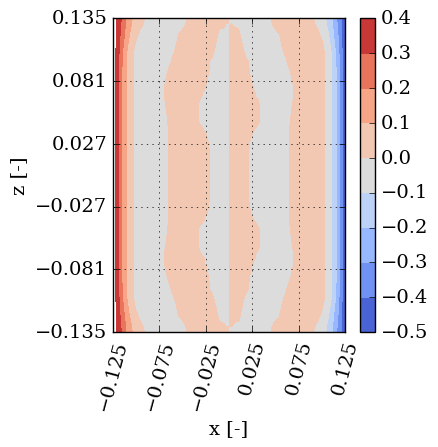

In [79]:
make_plot(mesh_x,mesh_y,T,10,30)